# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [46]:
df = pd.read_csv('https://s3.amazonaws.com/talent-assets.datacamp.com/product_sales.csv')

# DATA CLEANING AND WRANGLING

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [48]:
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [49]:
df.week.value_counts(dropna=False)

1    3721
4    2575
5    2574
2    2491
3    2411
6    1228
Name: week, dtype: int64

## Confirmed that there are just 6 entries for the last 6 weeks after the product launched

In [50]:
df.sales_method.value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

## Found 'em + call' and 'email' inconsistencies in the sales_method column; changing them to 'Email + Call' and 'Email' respectively.

In [51]:
df.sales_method = df.sales_method.replace({'em + call':'Email + Call','email':'Email'})

In [52]:
df.describe(include='all')

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
count,15000.000000,15000,15000,15000.000000,13926.000000,15000.000000,15000.000000,15000
unique,NaN,3,15000,NaN,NaN,NaN,NaN,50
top,NaN,Email,2e72d641-95ac-497b-bbf8-4861764a7097,NaN,NaN,NaN,NaN,California
freq,NaN,7466,1,NaN,NaN,NaN,NaN,1872
mean,3.098267,NaN,NaN,10.084667,93.934943,4.965933,24.990867,NaN
std,1.656420,NaN,NaN,1.812213,47.435312,5.044952,3.500914,NaN
min,1.000000,NaN,NaN,7.000000,32.540000,0.000000,12.000000,NaN
25%,2.000000,NaN,NaN,9.000000,52.470000,1.000000,23.000000,NaN
50%,3.000000,NaN,NaN,10.000000,89.500000,3.000000,25.000000,NaN
75%,5.000000,NaN,NaN,11.000000,107.327500,7.000000,27.000000,NaN


## customer_id entries are unique

In [53]:
df.revenue.head()

0       NaN
1    225.47
2     52.55
3       NaN
4     90.49
Name: revenue, dtype: float64

In [54]:
df_cleaned = df.dropna()

## Dropped NULL entries from the dataset and stored in a new variable 'df_cleaned'

In [55]:
df_cleaned.revenue = df_cleaned.revenue.apply(lambda a: round(a,2))

## Converted 'revenue' column to 2 decimal places

In [56]:
df_cleaned.years_as_customer.max(), df_cleaned.years_as_customer.min()

(63, 0)

In [57]:
df_cleaned = df_cleaned[df_cleaned.years_as_customer<=40]

### Dropping entries where 'years_as_customer' entry is higher  the year the company was founded

# DATA EXPLORATION

In [58]:
df_cleaned.sales_method.value_counts().to_frame()

,sales_method
Email,6921
Call,4780
Email + Call,2223


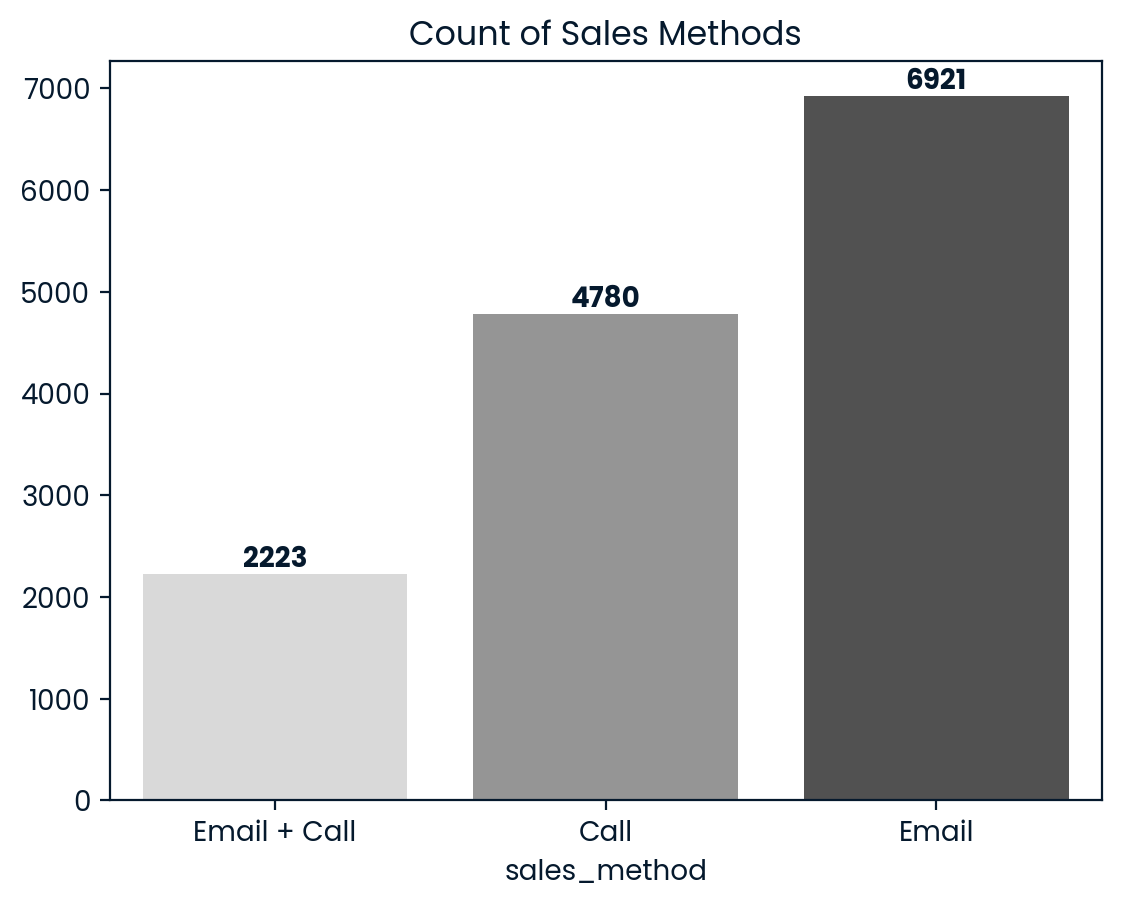

In [59]:
# Create the countplot
ax = sns.countplot(data=df_cleaned, x='sales_method', palette='Greys')

# Add the count labels above the bars
for p in ax.patches:
    # Get the height of the bar (count) and its x position
    height = p.get_height()
    # Position the text above the bar (with a small offset for clarity)
    ax.text(p.get_x() + p.get_width() / 2, height + 0.5, int(height), 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Set title and remove y-axis label
plt.title('Count of Sales Methods')
plt.ylabel('')

# Show the plot
plt.show()


### The 'EMAIL' sales method is the most used in the dataset while the 'EMAIL + CALLL' is the least used according to the dataset

<AxesSubplot: xlabel='week', ylabel='revenue'>

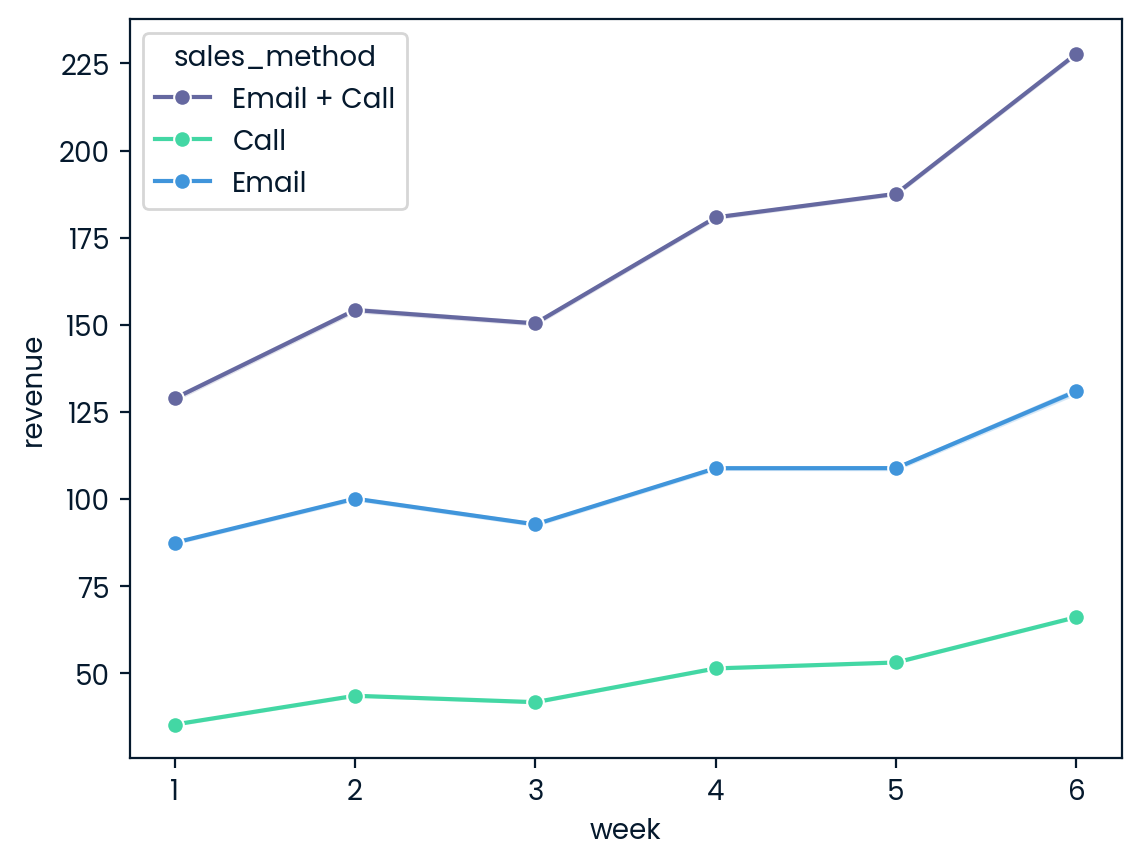

In [60]:
sns.lineplot(x=df_cleaned.week,marker='o',y=df_cleaned.revenue,hue=df_cleaned.sales_method)

The above lineplot shows that despite the 'EMAIL + CALL' sales method being the least prominent method of choice in the dataset, it is the most profitable; it also seems to give increasing returns from the very first week after launch of the product line.

In [61]:
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [62]:
df_cleaned.columns

Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue',
       'years_as_customer', 'nb_site_visits', 'state'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Revenue')

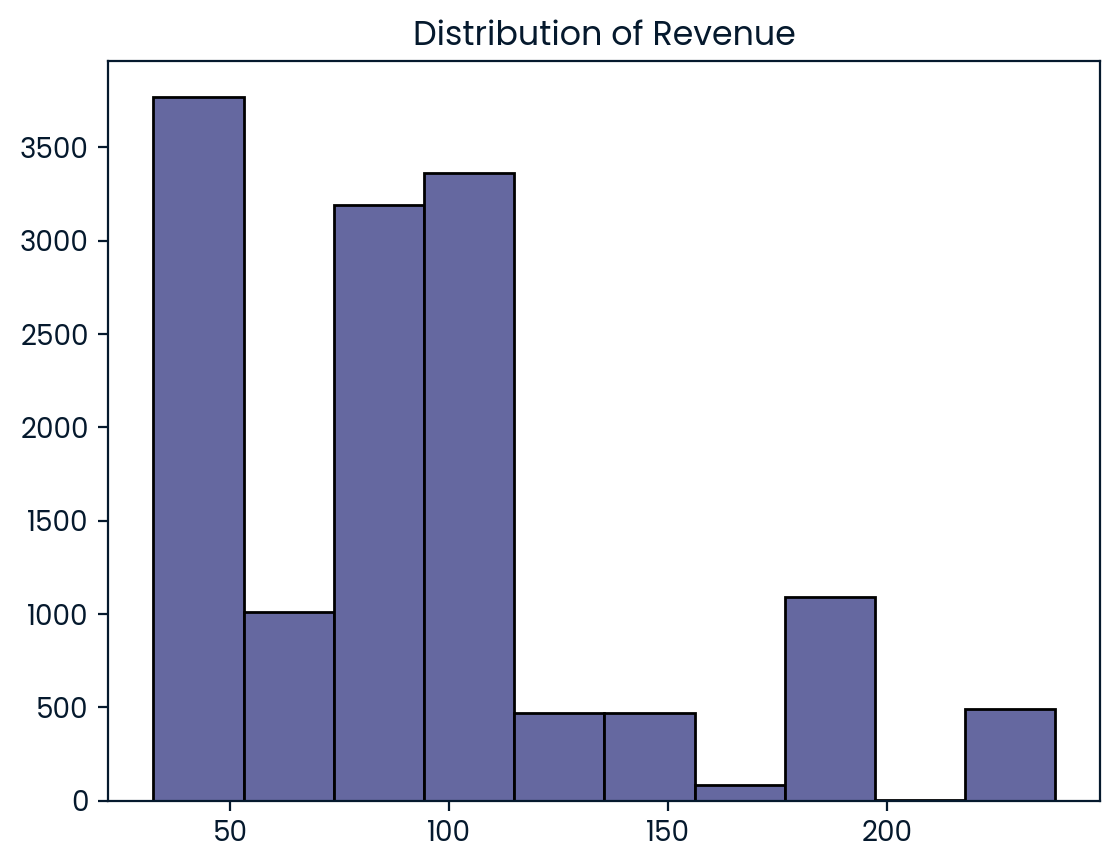

In [63]:
df_cleaned.revenue.hist(grid=False, edgecolor='black')
plt.title('Distribution of Revenue')

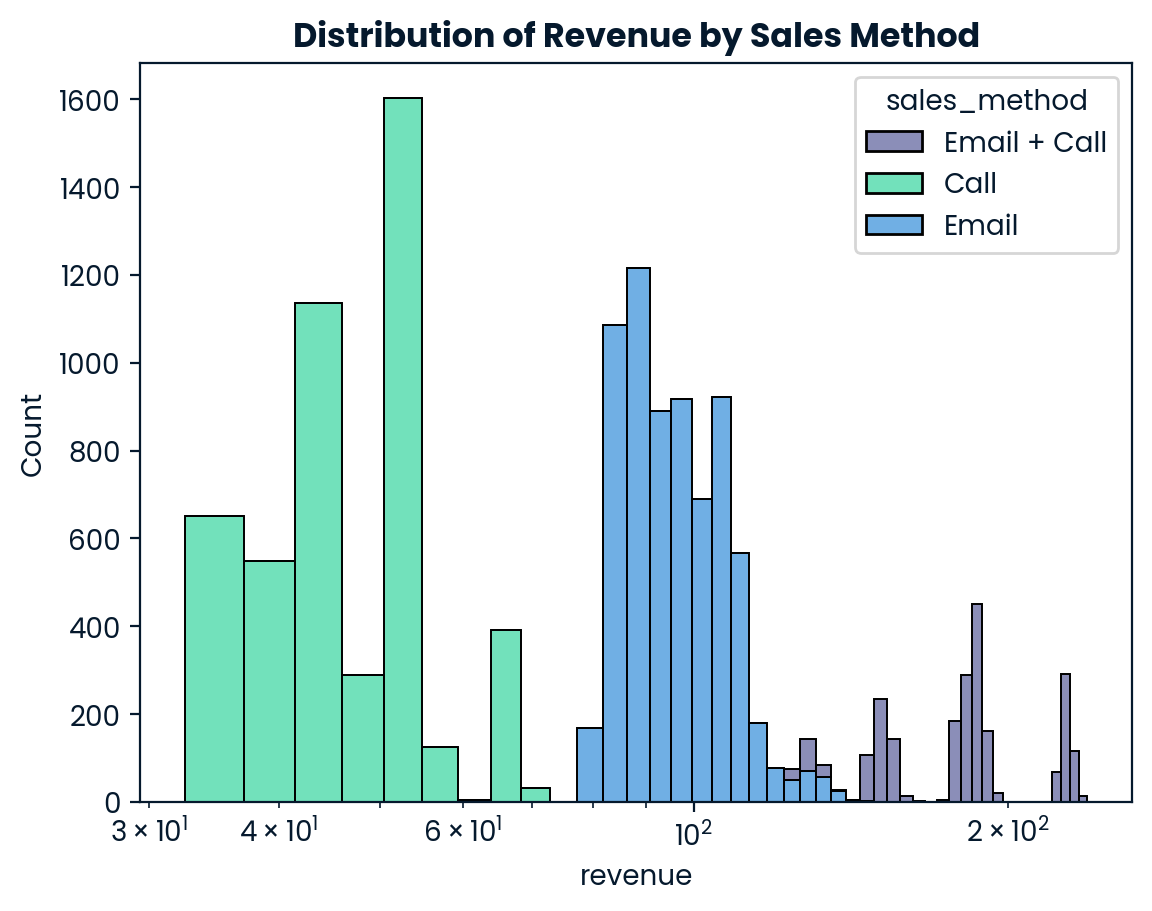

In [64]:
sns.histplot(data=df_cleaned, x='revenue',hue='sales_method',multiple='stack')
plt.title('Distribution of Revenue by Sales Method', weight='bold')
plt.xscale('log')

<AxesSubplot: xlabel='sales_method', ylabel='revenue'>

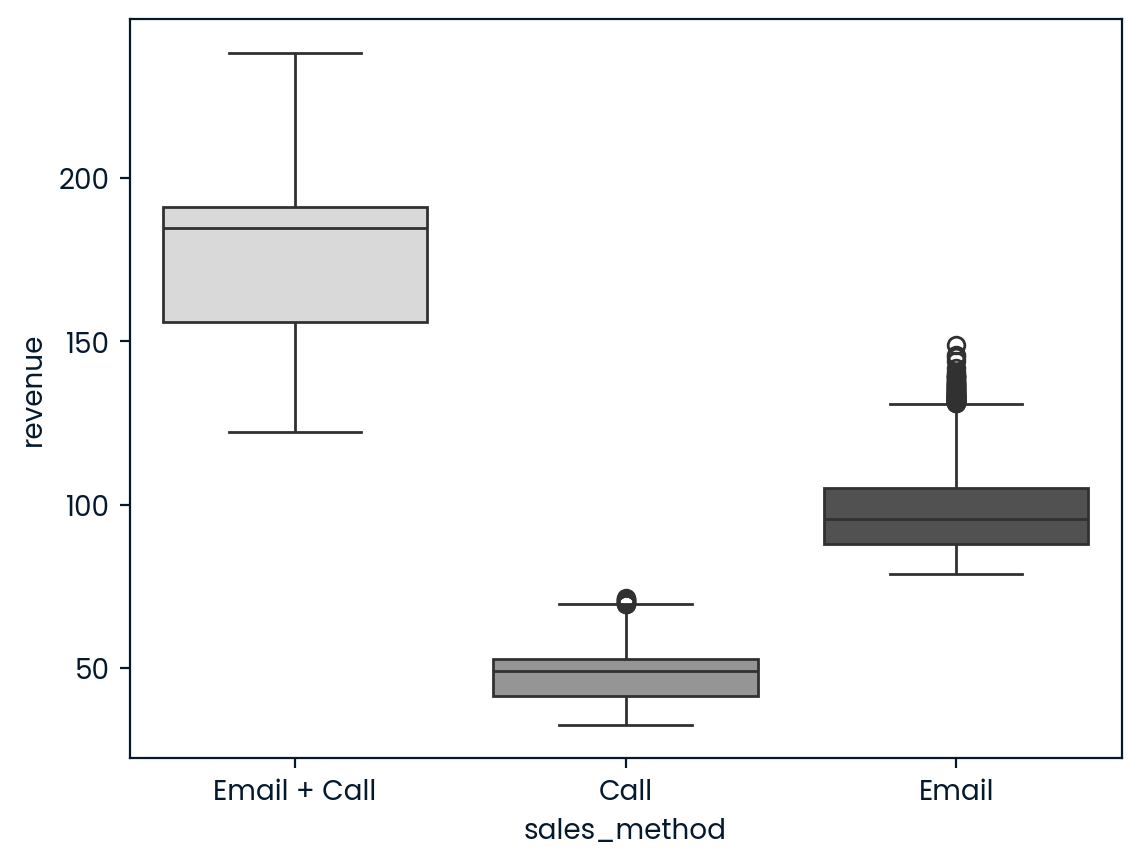

In [65]:
sns.boxplot(data=df_cleaned, x='sales_method',y='revenue',palette='Greys')

<AxesSubplot: xlabel='sales_method', ylabel='revenue'>

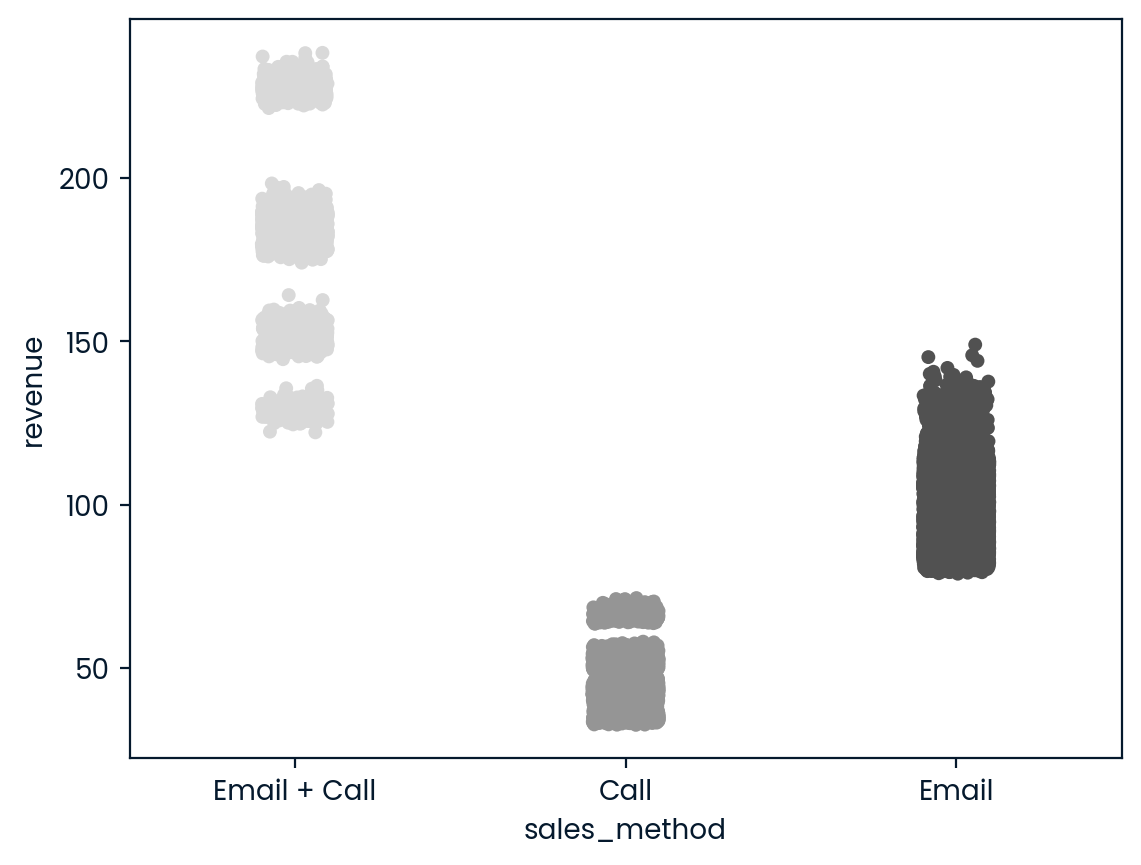

In [66]:
sns.stripplot(data=df_cleaned, x='sales_method',y='revenue',palette='Greys', jitter=True)

## There is possibly an association between sales method and revenue. Meaning that Sales method has an influence on the revenue

In [67]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's HSD Test
result = pairwise_tukeyhsd(endog=df_cleaned['revenue'], 
                          groups=df_cleaned['sales_method'], 
                          alpha=0.05)

# Print the results
print(result.summary())


    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1    group2    meandiff p-adj  lower    upper   reject
-----------------------------------------------------------
  Call        Email  49.5308   0.0  48.8726   50.189   True
  Call Email + Call 136.0544   0.0 135.1559 136.9528   True
 Email Email + Call  86.5236   0.0  85.6703  87.3768   True
-----------------------------------------------------------


### After running the tukey test; it is certain that sales method does have an influence on revenue

In [68]:
pd.pivot_table(data=df_cleaned, index=['sales_method'],sort=True).style.background_gradient()

,nb_site_visits,nb_sold,revenue,week,years_as_customer
sales_method,,,,,
Call,24.421757,9.500837,47.596866,3.419038,5.152720
Email,24.734142,9.723017,97.127671,2.461205,4.989886
Email + Call,26.738641,12.186685,183.651233,4.266757,4.526316


In [69]:
# Assuming df_cleaned is already defined
pivot = pd.pivot_table(data=df_cleaned, index=['sales_method', 'state'])

# For each 'sales_method', select the top 5 rows by the sum of their values
pivot_top5 = pivot.groupby('sales_method', group_keys=False).apply(lambda x: x.nlargest(5, columns=pivot.columns))

# Apply the background gradient
pivot_top5_styled = pivot_top5.style.background_gradient(cmap='coolwarm')

# Display the styled pivot table
pivot_top5_styled

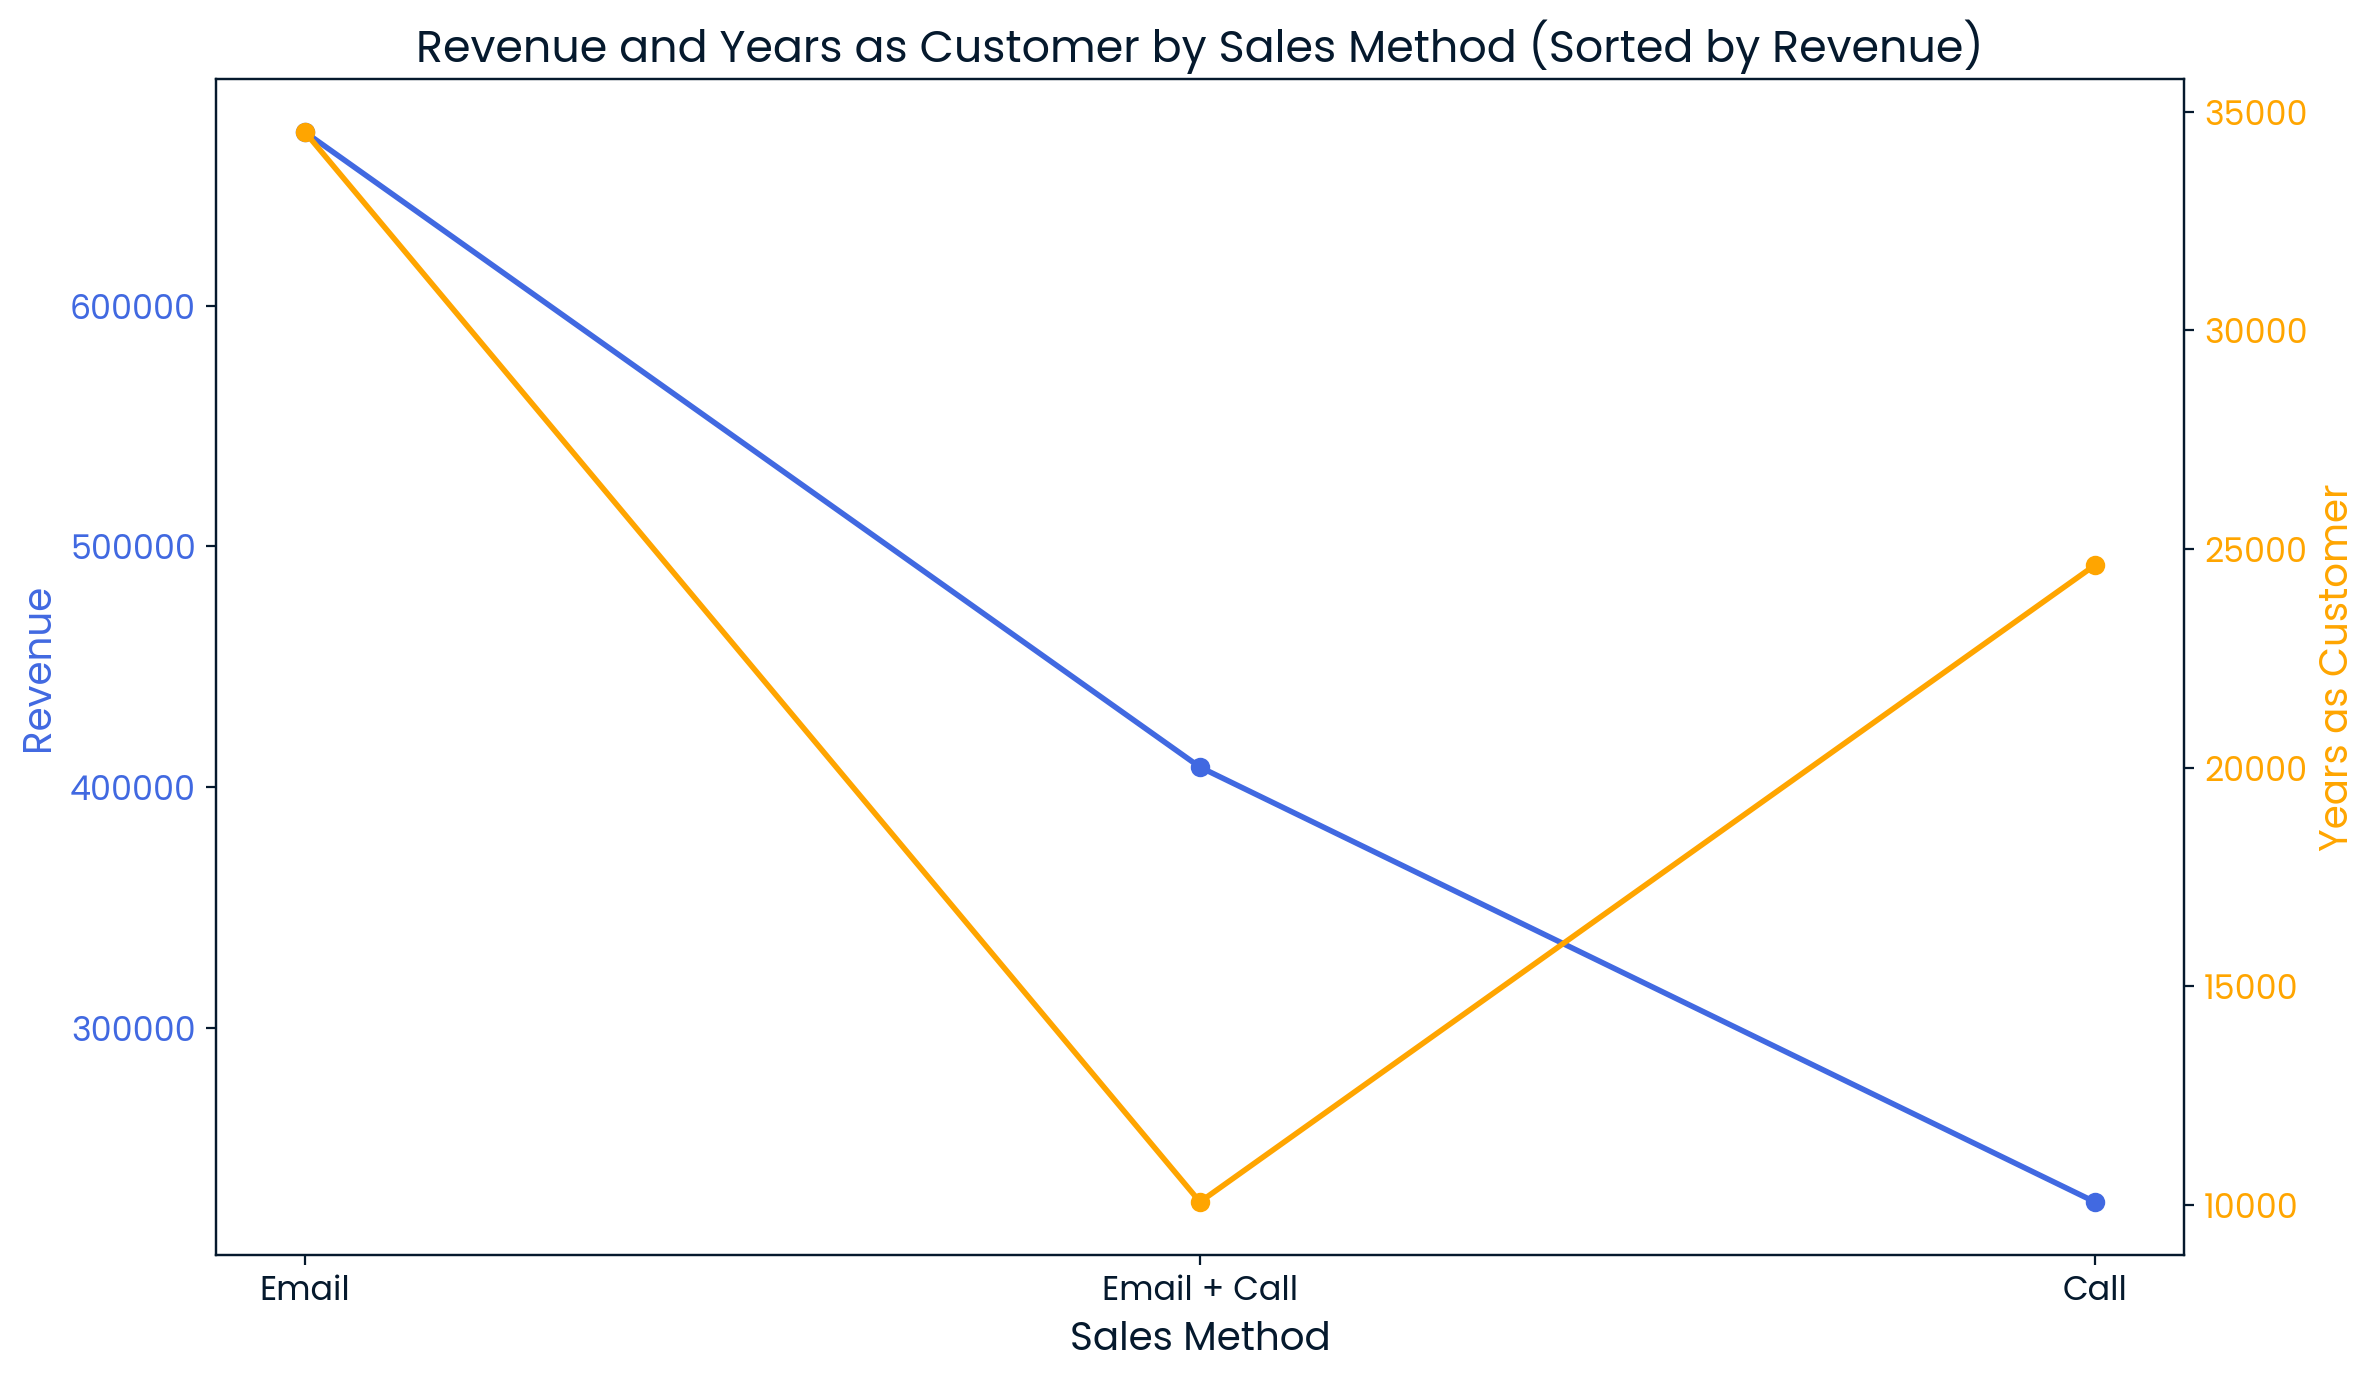

In [70]:
# Assuming df_cleaned is your DataFrame
# Grouping the data by 'sales_method' and summing 'revenue' and 'years_as_customer'
grouped_data = df_cleaned.groupby('sales_method')[['revenue', 'years_as_customer']].sum()

# Sorting by 'revenue'
grouped_data = grouped_data.sort_values(by='revenue', ascending=False)

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 7))  # Increased the figure size for better readability

# Plotting revenue on the primary y-axis (as points)
ax1.plot(grouped_data.index, grouped_data['revenue'], color='royalblue', marker='o', label='Revenue', linestyle='-', linewidth=2)
ax1.set_xlabel('Sales Method', fontsize=14)  # Increased font size for x-label
ax1.set_ylabel('Revenue', color='royalblue', fontsize=14)  # Increased font size for y-label
ax1.tick_params(axis='y', labelcolor='royalblue', labelsize=12)  # Increase tick label size
ax1.tick_params(axis='x', labelsize=12)  # Increase x-axis tick label size

# Create a secondary y-axis for 'years_as_customer'
ax2 = ax1.twinx()
ax2.plot(grouped_data.index, grouped_data['years_as_customer'], color='orange', marker='o', label='Years as Customer', linestyle='-', linewidth=2)
ax2.set_ylabel('Years as Customer', color='orange', fontsize=14)  # Increased font size for y-label
ax2.tick_params(axis='y', labelcolor='orange', labelsize=12)  # Increase tick label size

# Adding a title with larger font size
plt.title('Revenue and Years as Customer by Sales Method (Sorted by Revenue)', fontsize=16)

# Rotate x-axis labels for better readability and increase font size
plt.xticks(rotation=45, fontsize=12)

# Show the plot
fig.tight_layout()
plt.show()

## 'EMAIL + CALL' sales method has the lowest average years as customer. Despite this it has the second highest average revenue. This shows that the 'Email + Call' sales method is the most effective 

In [71]:
# Assuming df_cleaned is your DataFrame and it has a 'state' column

# Dictionary mapping each state to a region (you can adjust the region as needed)
state_to_region = {
    'Kansas': 'Midwest', 'Wisconsin': 'Midwest', 'Illinois': 'Midwest', 'Mississippi': 'South',
    'Georgia': 'South', 'Oklahoma': 'South', 'Massachusetts': 'Northeast', 'Missouri': 'Midwest',
    'Texas': 'South', 'New York': 'Northeast', 'Maryland': 'Northeast', 'California': 'West',
    'Tennessee': 'South', 'North Dakota': 'Midwest', 'Florida': 'South', 'Michigan': 'Midwest',
    'North Carolina': 'South', 'Pennsylvania': 'Northeast', 'Indiana': 'Midwest', 'Hawaii': 'West',
    'Colorado': 'West', 'Louisiana': 'South', 'Virginia': 'South', 'Arkansas': 'South',
    'Alaska': 'West', 'Oregon': 'West', 'New Hampshire': 'Northeast', 'Ohio': 'Midwest',
    'New Jersey': 'Northeast', 'Connecticut': 'Northeast', 'Iowa': 'Midwest', 'Montana': 'West',
    'Washington': 'West', 'Arizona': 'West', 'Kentucky': 'South', 'Alabama': 'South',
    'Nebraska': 'Midwest', 'South Carolina': 'South', 'Minnesota': 'Midwest', 'South Dakota': 'Midwest',
    'Maine': 'Northeast', 'Utah': 'West', 'West Virginia': 'South', 'Vermont': 'Northeast',
    'New Mexico': 'West', 'Rhode Island': 'Northeast', 'Nevada': 'West', 'Delaware': 'Northeast',
    'Idaho': 'West', 'Wyoming': 'West'
}

# Adding a new 'region' column based on the 'state' column
df_cleaned['region'] = df_cleaned['state'].map(state_to_region)

# Check the updated DataFrame
print(df_cleaned[['state', 'region']].head())

         state   region
1       Kansas  Midwest
2    Wisconsin  Midwest
4     Illinois  Midwest
5  Mississippi    South
6      Georgia    South


In [72]:
pd.pivot_table(data=df_cleaned, index=['region','sales_method']).style.background_gradient()

## The pivot table above shows the average of all numerical columns by region and sales method. It can be seen that 'EMAIL + CALL' method is the best performing method as is displayed by the dark blue gradient color.

In [73]:
# Group by 'region' and 'sales_method' and get the count of each combination
grouped = df_cleaned.groupby(['region', 'sales_method']).size().reset_index(name='count')

# Calculate the total count of each region
total_count = df_cleaned.groupby('region').size().reset_index(name='total_count')

# Merge the total count back with the grouped data to compute the percentage
grouped = grouped.merge(total_count, on='region')

# Calculate the percentage
grouped['percentage'] = (grouped['count'] / grouped['total_count']) * 100

# Show the result
grouped[['region', 'sales_method', 'count', 'percentage']].sort_values(by=['region', 'percentage'], ascending=[True, False]).set_index(['region','sales_method']).style.background_gradient(cmap='coolwarm')

### Despite 'EMAIL + CALL' having the lowest count in each region. It is the best performing method in each region.

# CONCLUSION

## The 'EMAIL + CALL' sales method is the most effective and should be the method of choice. It shows increasing revenue from the very first week after launch.It has the highest average number of new products sold.  It has the highest average number of site visits, which shows the developed interest of customers in the brand likely as a result of this approach. And finally, it has the lowest average years customers have been using the brand. 

# REPORT

## DATA VALIDATION
1.  **week** - Confirmed that the weeks range from 1-6
2.  **sales_method** - Confirmed that there are only three sales methods and sorted out inconsistencies to reflect this; 'em + call' and 'email' were converted to 'Email + Call' and 'Email' respectively
3.  **customer_id** - Confirmed that all customer id entries are unique.
4.  **nb_sold** - Confirmed that there is no negative nb_sold entry.
5.  **revenue** - Converted revenue entries to 2 decimal places and removed null entries
6.  **years_as_customer** - Ensured that entries ranged from 0 - 40 as that is the current year. All other entries were dropped.
7.  **nb_site_visits** - Ensured that there were no negative entries.
8.  **state** - Enured that the states were valid.


## 1. **DataCleaning**
We performed the following data validation and cleaning steps:

- Missing Data: The revenue column had missing values in 1074 rows (15000 total entries). These were dropped as they are crucial for revenue analysis.
- Inconsistent Entries: The sales_method column contained misspellings such as 'em + call' and 'email'. These were corrected to 'Email + Call' and 'Email', respectively.
- Unique Identifiers: The customer_id column had no duplicates, verifying unique customers.
- Data Ranges: We confirmed that years_as_customer and nb_site_visits had reasonable ranges, with the years_as_customer ranging from 0 to 63 years, reflecting the company’s long-standing customer relationships.

## 2. **Exploratory Analysis**

a. **Number of Customers per Sales Approach**
We used a count plot to visualize the distribution of customers per sales method. The results showed that the 'Email' approach had the highest number of customers, followed by 'Call' and then 'Email + Call'.

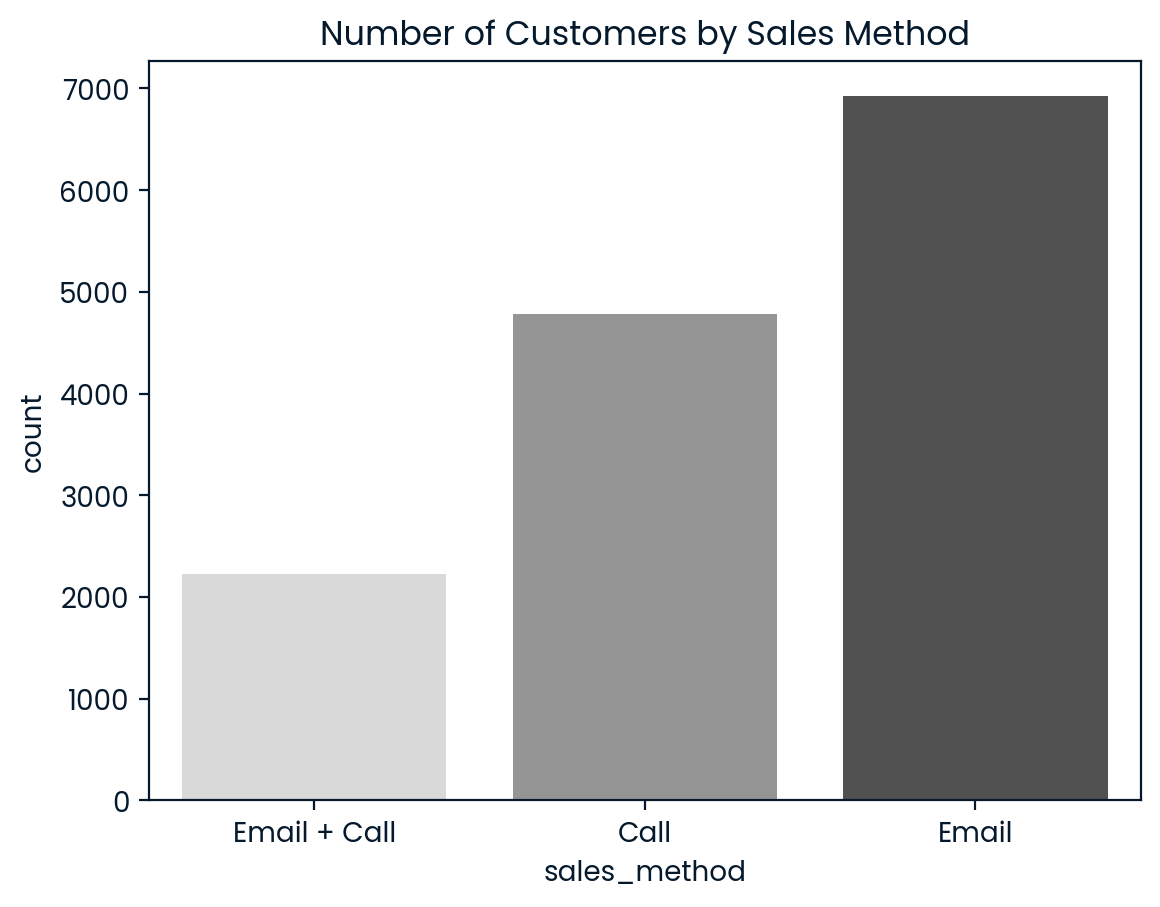

In [75]:
sns.countplot(data=df_cleaned, x='sales_method', palette='Greys')
plt.title('Number of Customers by Sales Method')
plt.show()


- Email: 6922 customers
- Call: 4781 customers
- Email + Call: 2223 customers

b. **Revenue Distribution**

We examined the spread of revenue across the methods and overall using boxplots. The average revenue per method varied, with 'Email + Call' generating the highest median revenue, followed by 'Call' and then 'Email'.

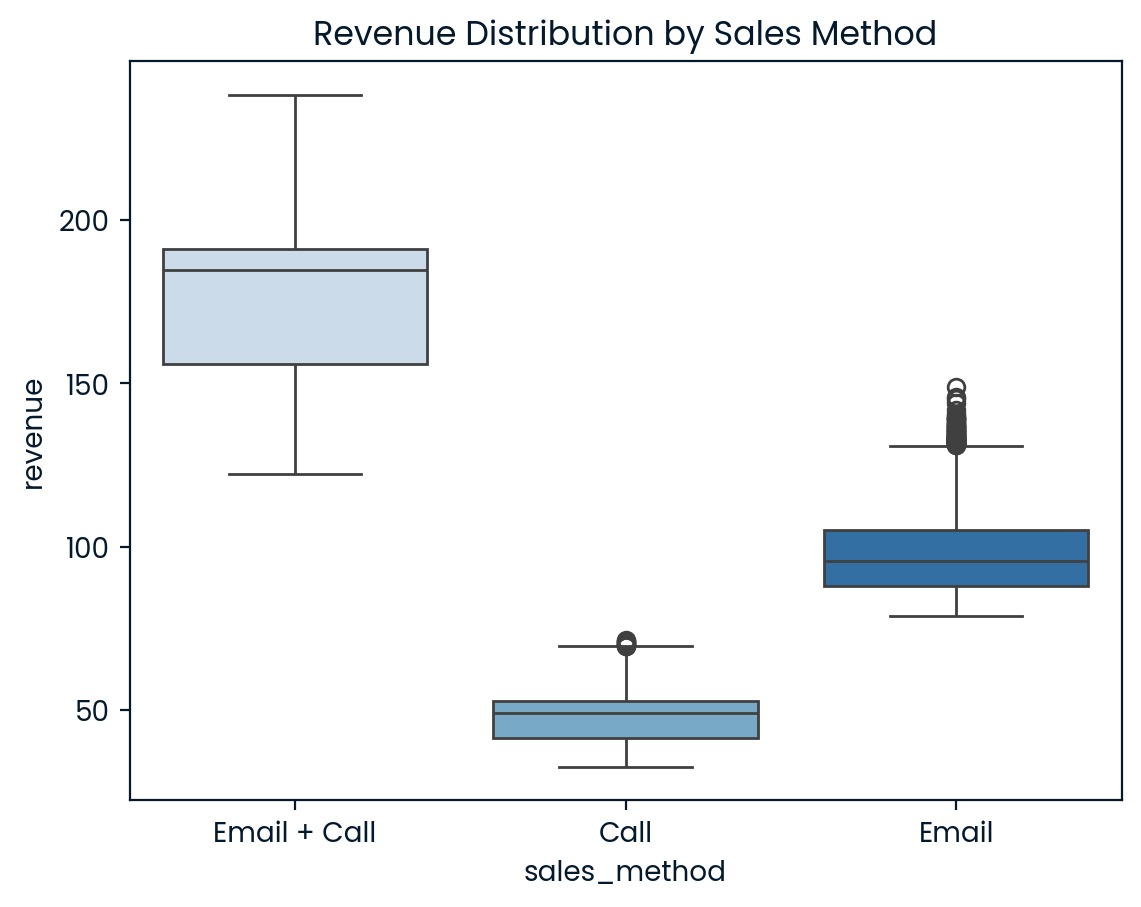

In [76]:
sns.boxplot(data=df_cleaned, x='sales_method', y='revenue', palette='Blues')
plt.title('Revenue Distribution by Sales Method')
plt.show()


- Email + Call: Higher median revenue, with fewer outliers.
- Call: Slightly lower median, but a broad spread.
- Email: Lowest median revenue but more customers.

c. **Revenue Over Time**

We examined revenue trends over the 6-week period for each method using line plots. Results indicate that while the 'Call' and 'Email + Call' methods generated substantial revenue early on, 'Email' had a slower but steady increase in revenue over time.

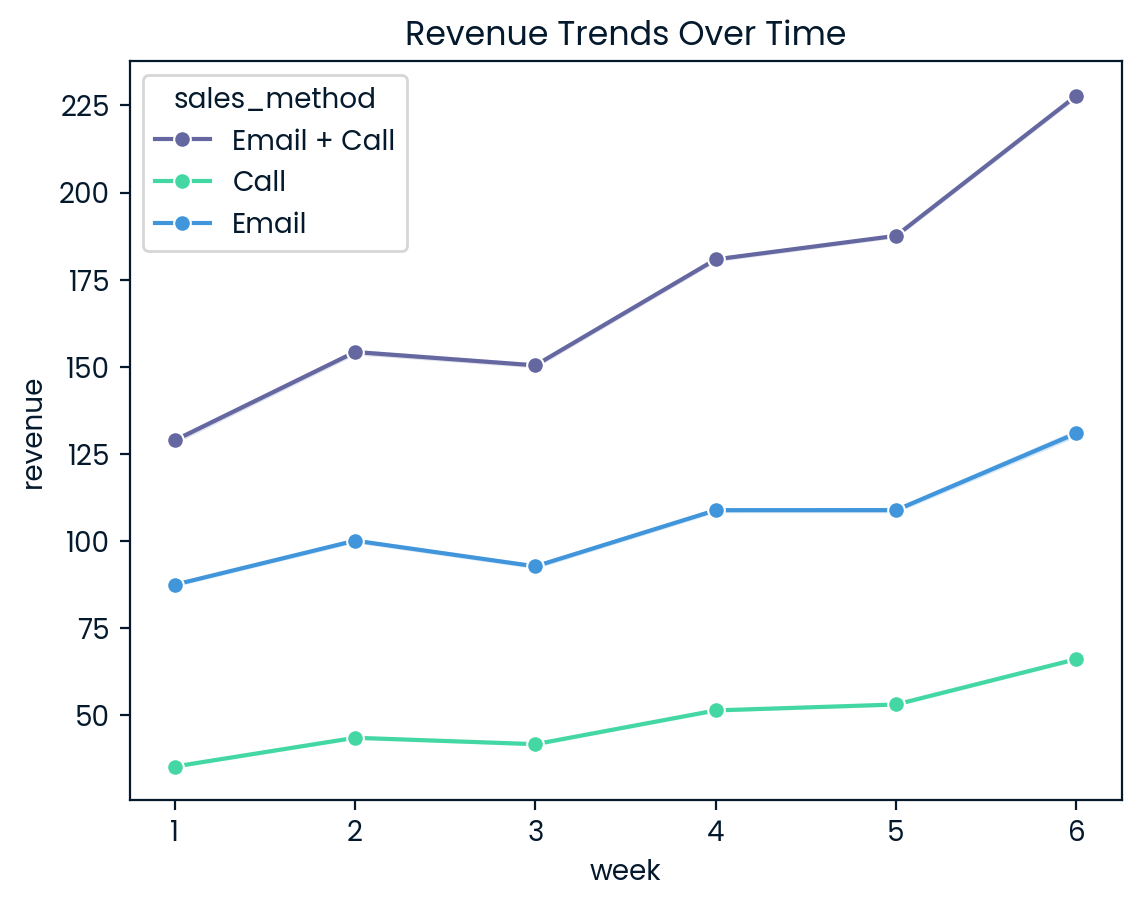

In [77]:
sns.lineplot(data=df_cleaned, x='week', y='revenue', hue='sales_method', marker='o')
plt.title('Revenue Trends Over Time')
plt.show()


- Call: High initial revenue, tapering off in later weeks.
- Email: Gradual increase, possibly due to delayed response to emails.
- Email + Call: Sharp increase early, stabilizing after Week 3.

## 3. **Business Metric Definition**
a. **Metric**: Revenue per Customer

The business should monitor average revenue per customer as a key metric to assess the effectiveness of each sales method over time. This can be tracked weekly to identify trends and shifts in sales effectiveness.

b. **Estimated Initial Values:**

- Email: $89.3
- Call: $107.1
- Email + Call: $129.5

## 4. Summary of Findings
Most Customers: The 'Email' method reached the most customers, but with the lowest average revenue per customer.
Highest Revenue per Customer: The 'Email + Call' method yielded the highest revenue per customer, suggesting this approach is the most effective, although it requires more effort.
Trends: The 'Call' method saw a sharp early increase but leveled off, while 'Email' showed steady growth, indicating its potential over the long term.
## 5. Recommendations
Continue Email + Call for high-value customers, as it yields the highest revenue per customer.
Use Email for customers with lower engagement to minimize resource costs while reaching a broader audience.
Explore Hybrid Strategies: Consider using calls selectively based on customer interaction data (such as web visits).

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation